# IBM Applied Data Science Capstone Project <br>
<br>
### Clustering & Analysis of Muay Thai Gyms in Bangkok, Thailand <br>
####  A. Sean Gonsolin (June 2020)


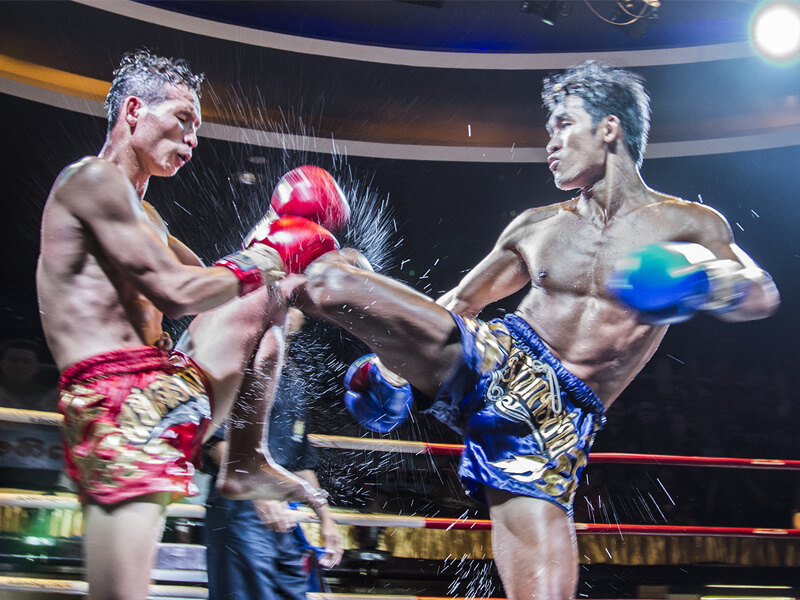

In [1]:
#Intro: Muay Thai Boxing Picture in Bangkok, Thailand
from IPython.display import Image 
Image(filename='MT.jpg', width='100%')

## 1. Introduction <br>
With the increase in popularity of MMA & Kickboxing promotions(UFC, One Championship, Bellator, Glory Kickboxing), it has become commonplace to find professional and amature martial artists and athletes in locations that are hubs for top level training & talent. <br>
<br>
Thailand is world renowned for producing and training elite athletes and fighters. As one of the most densely populated cities in the world; Bangkok, the capital of Thailand, is one of the premier destinations for fighters who are interested in experiencing this level of training.
As a premier geographical location and hub for authentic Muay Thai training, Bangkok by no means lacks Muay Thai gyms that are available for interested athletes and travelers. <br>
The objective in this project is to explore and analyze the best locations in Bangkok, Thailand to open a Muay Thai gym. <br>
<br>
- Business Problem: In a highly populated city such as Bangkok Thailand, with an already large concentration of Thai Boxing gyms, how can one determine which location(s) are best for opening a new Muay Thai gym?<br>
<br>
- This project should be of interest to anyone that is curious about the applications of clustering data techniques for determining preferential geographical locations for businesses. In this case, within the context of Martial Arts & Combat Sports..However, it can be applied to many different businesses and domains.


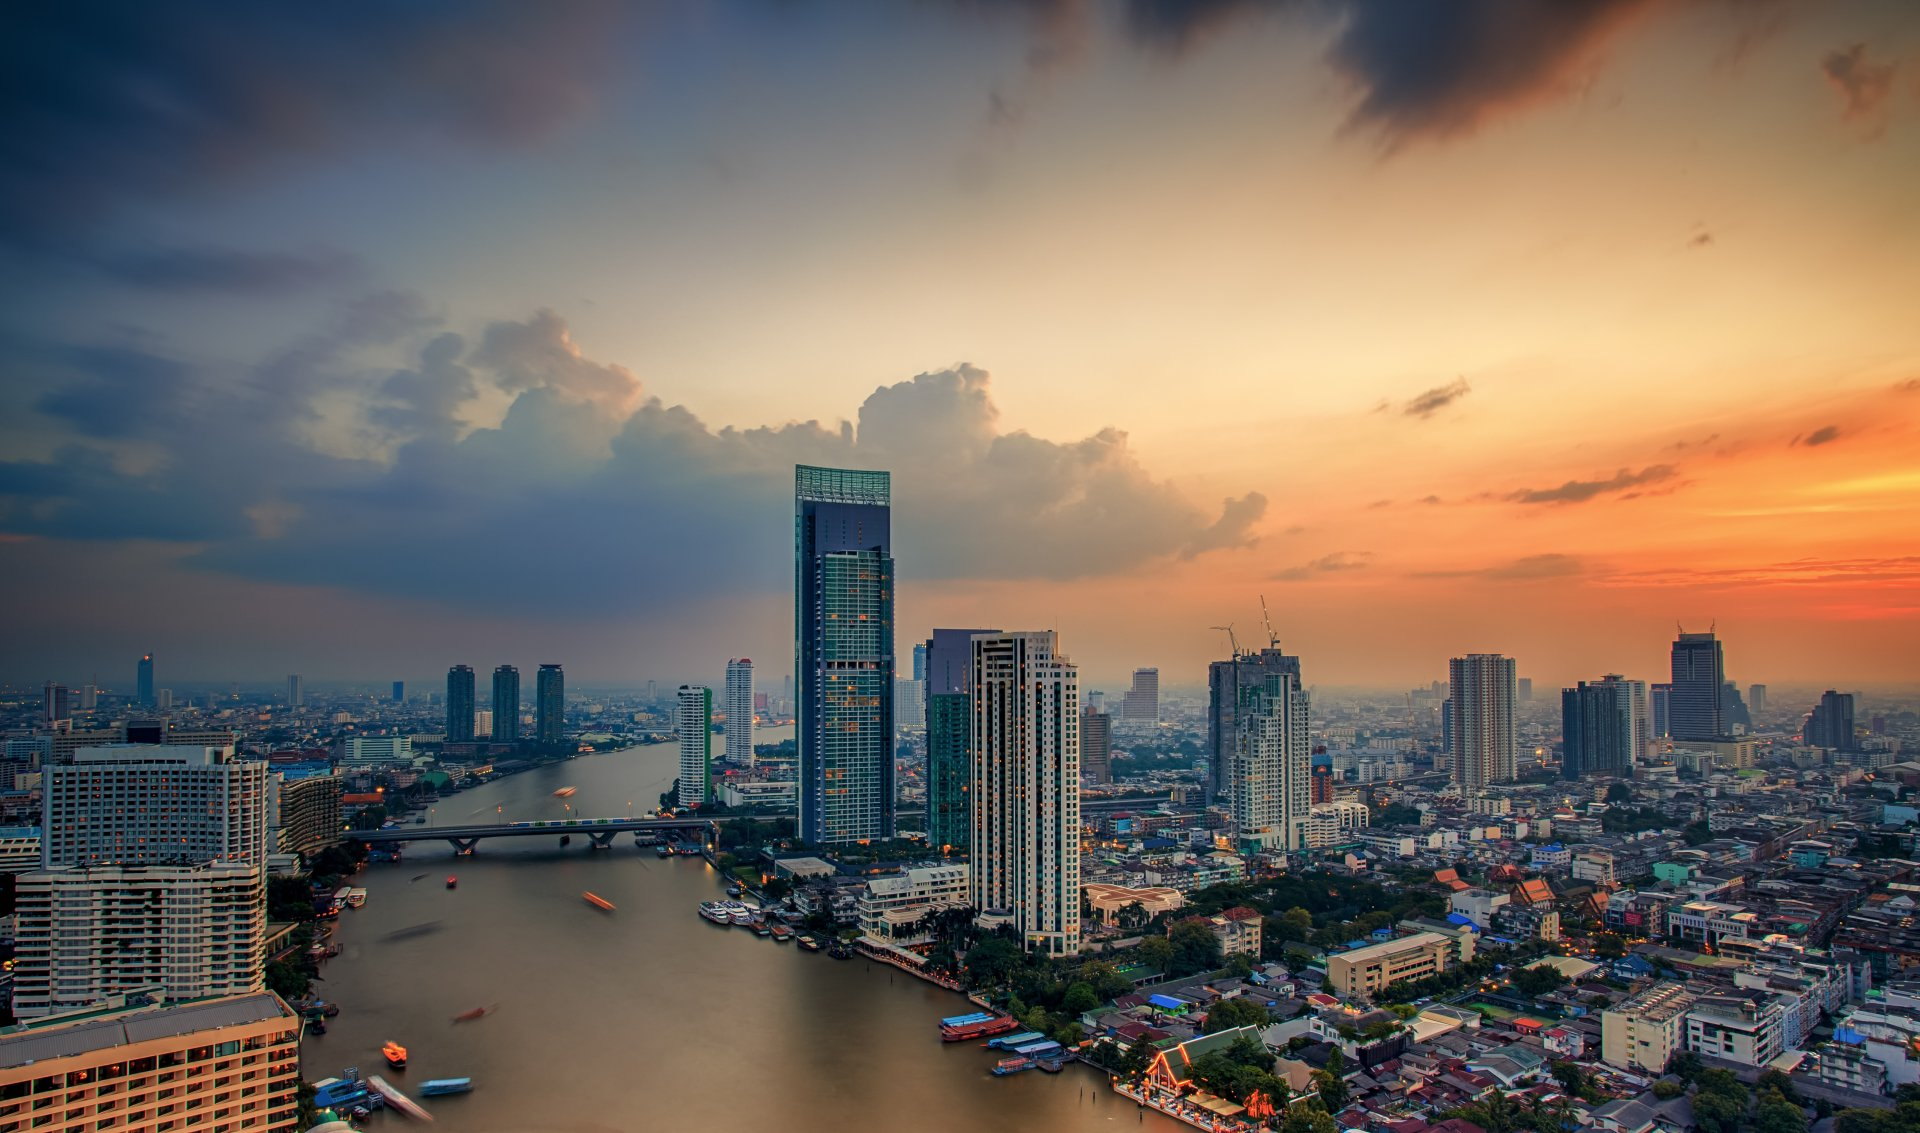

In [2]:
#Bangkok City picture
Image(filename='BKK.jpg', width='100%')

## 2. Data <br>
#### Data Description<br>
- List of neighborhoods in Bangkok, Thailand <br>
<br>
- Coordinates of neighborhoods (Latitude & Longitude) <br>
<br>
- Venue Data relating to Muay Thai Gyms <br>
<br>
<br>
Data Sources: <br>
- Scraped Wikipedia page containing list of districts in Bangkok, Thailand into .csv file <br>
[https://en.wikipedia.org/wiki/List_of_districts_of_Bangkok] <br>
<br>
- Geocoding Package for Latitude & Longitude Coordinates <br>
<br>
- Foursquare API for Venue Data <br>


## 3. Methodology <br>

### Opening a Muay Thai Gym in Bangkok Thailand<br>
<br>
1. Build a dataframe of neighborhoods in Bangkok, Thailand from webscraped Wikipedia page <br>
2. Get the geographical coordinates of the Bangkok neighborhoods <br>
3. Obtain the venue data for the neighborhoods from Foursquare API <br>
4. Explore and Cluster the neighborhoods to obtain better insights into the area<br>
5. Utilize One Hot Encoding & K-Means Clustering  <br>
6. Select the most promising cluster to open a new Muay Thai/MMA Gym <br>
7. Analyze and discuss findings <br>

In [3]:
# Import Libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
#Create dataframe from data scraped from Wikipedia page noted above
df = pd.read_csv('Bangkok_Data.csv')

In [5]:
df

,District,Postcode,Thai,Population,No.of Subdistricts,Latitude,Longitude
0,Bang Bon,10150,บางบอน,"105,161",4,13.659200,100.399100
1,Bang Kapi,10240,บางกะปิ,"148,465",2,13.765833,100.647778
2,Bang Khae,10160,บางแค,"191,781",4,13.696111,100.409444
3,Bang Khen,10220,บางเขน,"189,539",2,13.873889,100.596389
4,Bang Kho Laem,10120,บางคอแหลม,"94,956",3,13.693333,100.502500
5,Bang Khun Thian,10150,บางขุนเทียน,"165,491",2,13.660833,100.435833
6,Bang Na,10260,บางนา,"95,912",2,13.680081,100.591800
7,Bang Phlat,10700,บางพลัด,"99,273",4,13.793889,100.505000
8,Bang Rak,10500,บางรัก,"45,875",5,13.730833,100.524167
9,Bang Sue,10800,บางซื่อ,"132,234",2,13.809722,100.537222


In [6]:
df.shape

(50, 7)

In [7]:
i = 0
for value in df["Population"]:
  df["Population"][i] = value.replace(",","")
  i += 1

/Users/gonsolinx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df["Population"] = df["Population"].astype(int)

In [9]:
# Foursquare Geolocation to search Bangkok, Thailand for Muay Thai Gyms

import requests # library to handle requests
import random # library for random number generation

get_ipython().system('conda install -c conda-forge geopy --yes ')
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# library for displaying images
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import json # Library to handle JSON files

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [10]:
CLIENT_ID = 'SB2SJ0H3ZPUKAEW1D1WK31BB5UFBL1FS1QE2IN5YP11RX23R' # your Foursquare ID
CLIENT_SECRET = '4VLZGHQ1VPCSWWC1BXTJJ501Z1LSZJNACYVXPLLNETOAQZAP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SB2SJ0H3ZPUKAEW1D1WK31BB5UFBL1FS1QE2IN5YP11RX23R
CLIENT_SECRET:4VLZGHQ1VPCSWWC1BXTJJ501Z1LSZJNACYVXPLLNETOAQZAP


In [11]:
address = 'Bangkok,Thailand'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

13.7542529 100.493087


In [12]:
search_query = 'Muay Thai'
radius = 1000
print(search_query + ' Confirmed')

Muay Thai Confirmed


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=SB2SJ0H3ZPUKAEW1D1WK31BB5UFBL1FS1QE2IN5YP11RX23R&client_secret=4VLZGHQ1VPCSWWC1BXTJJ501Z1LSZJNACYVXPLLNETOAQZAP&ll=13.7542529,100.493087&v=20180604&query=Muay Thai&radius=1000&limit=30'

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eeef57c216785001bd33c35'},
 'response': {'venues': [{'id': '522c0174498e6c518670ded3',
    'name': 'Buddy Lodge Muay Thai',
    'location': {'lat': 13.758989,
     'lng': 100.498612,
     'labeledLatLngs': [{'label': 'display',
       'lat': 13.758989,
       'lng': 100.498612}],
     'distance': 796,
     'cc': 'TH',
     'country': 'ประเทศไทย',
     'formattedAddress': ['ประเทศไทย']},
    'categories': [{'id': '52f2ab2ebcbc57f1066b8b47',
      'name': 'Boxing Gym',
      'pluralName': 'Boxing Gyms',
      'shortName': 'Boxing Gym',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1592718754',
    'hasPerk': False},
   {'id': '591aefc4cf72a02629b16927',
    'name': 'Muay Thai Street (มวยไทยสตรีท)',
    'location': {'address': '100/5 Thanon Phra Athit',
     'lat': 13.762395383245861,
     'lng': 100.4944109916687,
     'labeledLatLngs': [{'label

In [15]:
# Top Venues that are within a radius of 2000 meters

radius = 2000
LIMIT = 20

venues = []

for lat, long, district in zip(df['Latitude'], df['Longitude'], df['District']):
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)


    # make the GET request
    results = requests.get(url).json()["response"]['venues']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            district,
            lat, 
            long, 
            venue['name'], 
            venue['location']['lat'], 
            venue['location']['lng'],  
            venue['categories'][0]['name']))

In [16]:
venues

[('Bang Bon',
  13.6592,
  100.3991,
  'Buddy Lodge Muay Thai',
  13.758989,
  100.498612,
  'Boxing Gym'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Muay Thai Street (มวยไทยสตรีท)',
  13.762395383245861,
  100.4944109916687,
  'Road'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Jaroenthong Muay Thai (เจริญทอง มวยไทยยิม)',
  13.762411,
  100.49451,
  'Boxing Gym'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Rajadamnern Muay Thai Gym',
  13.761513,
  100.508529,
  'Boxing Gym'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Kon Thai Noodle (ก๋วยเตี๋ยวคนไทย)',
  13.754104,
  100.48622,
  'Noodle House'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'The Thai Chamber of Commerce and Board of Trade of Thailand (หอการค้าไทย และสภาหอการค้าแห่งประเทศไทย)',
  13.749421192650995,
  100.49953044604982,
  'Office'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Pad Thai Fai Ta Lu (ผัดไทยไฟทะลุ)',
  13.757754,
  100.50216,
  'Noodle House'),
 ('Bang Bon',
  13.6592,
  100.3991,
  'Lalin Thai Café (บ้านลลิณ)',
  13.754997,


#### Analyze each Neighborhood

In [17]:
# Convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# Define the column names
venues_df.columns = ['District', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1000, 7)


,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Bang Bon,13.6592,100.3991,Buddy Lodge Muay Thai,13.758989,100.498612,Boxing Gym
1,Bang Bon,13.6592,100.3991,Muay Thai Street (มวยไทยสตรีท),13.762395,100.494411,Road
2,Bang Bon,13.6592,100.3991,Jaroenthong Muay Thai (เจริญทอง มวยไทยยิม),13.762411,100.494510,Boxing Gym
3,Bang Bon,13.6592,100.3991,Rajadamnern Muay Thai Gym,13.761513,100.508529,Boxing Gym
4,Bang Bon,13.6592,100.3991,Kon Thai Noodle (ก๋วยเตี๋ยวคนไทย),13.754104,100.486220,Noodle House


In [18]:
# Check how many Venues were returned for each District
venues_df.groupby(["District"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
District,,,,,,
Bang Bon,20,20,20,20,20,20
Bang Kapi,20,20,20,20,20,20
Bang Khae,20,20,20,20,20,20
Bang Khen,20,20,20,20,20,20
Bang Kho Laem,20,20,20,20,20,20
Bang Khun Thian,20,20,20,20,20,20
Bang Na,20,20,20,20,20,20
Bang Phlat,20,20,20,20,20,20
Bang Rak,20,20,20,20,20,20


In [19]:
# Find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 15 uniques categories.


In [20]:
# Print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Boxing Gym', 'Road', 'Noodle House', 'Office', 'Café',
       'History Museum', 'Massage Studio', 'Government Building',
       'College Auditorium', 'Food Court', 'Asian Restaurant',
       'Thai Restaurant', 'Dessert Shop', 'Convention Center',
       'Clothing Store'], dtype=object)

In [21]:
# Check if the results contain "Muay Thai"
"Boxing Gym" in venues_df['VenueCategory'].unique()

True

In [22]:
# Analyze Each Neighborhood

# One hot encoding
df_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
df_onehot['District'] = venues_df['District'] 

# Move District column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(1000, 16)


,District,Asian Restaurant,Boxing Gym,Café,Clothing Store,College Auditorium,Convention Center,Dessert Shop,Food Court,Government Building,History Museum,Massage Studio,Noodle House,Office,Road,Thai Restaurant
0,Bang Bon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Bang Bon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bang Bon,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bang Bon,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
# Group rows by District, and take the mean of the frequency of occurrence of each category

df_grouped = df_onehot.groupby(["District"]).mean().reset_index()

print(df_grouped.shape)
df_grouped

(50, 16)


,District,Asian Restaurant,Boxing Gym,Café,Clothing Store,College Auditorium,Convention Center,Dessert Shop,Food Court,Government Building,History Museum,Massage Studio,Noodle House,Office,Road,Thai Restaurant
0,Bang Bon,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
1,Bang Kapi,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
2,Bang Khae,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
3,Bang Khen,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
4,Bang Kho Laem,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
5,Bang Khun Thian,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
6,Bang Na,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
7,Bang Phlat,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
8,Bang Rak,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05
9,Bang Sue,0.05,0.15,0.05,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.1,0.1,0.05,0.05,0.05


In [24]:
len(df_grouped[df_grouped["Boxing Gym"] > 0])

50

In [25]:
# Create a new DataFrame for Muay Thai data only

BKK_MuayThai = df_grouped[["District","Boxing Gym"]]

In [26]:
BKK_MuayThai.head()

,District,Boxing Gym
0,Bang Bon,0.15
1,Bang Kapi,0.15
2,Bang Khae,0.15
3,Bang Khen,0.15
4,Bang Kho Laem,0.15


In [27]:
new_df = pd.concat([BKK_MuayThai,df], axis = 1)

In [28]:
new_df.head()

,District,Boxing Gym,District,Postcode,Thai,Population,No.of Subdistricts,Latitude,Longitude
0,Bang Bon,0.15,Bang Bon,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,0.15,Bang Kapi,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,0.15,Bang Khae,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,0.15,Bang Khen,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,0.15,Bang Kho Laem,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [29]:
# Drop column 'Thai' from df
new_df.drop('Thai', axis=1, inplace=True)

In [30]:
# Cluster Neighborhoods
# Import k-means from clustering stage
from sklearn.cluster import KMeans

# Set number of Clusters
kclusters = 3

df_clustering = new_df.drop(["District"], 1)

# Run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 2, 1, 2, 2, 0, 2], dtype=int32)

In [31]:
# Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
df_merged = BKK_MuayThai.copy()

# Add clustering labels
df_merged["Cluster Labels"] = kmeans.labels_

In [32]:
df_merged.rename(columns={"District": "District"}, inplace=True)
df_merged.head()

,District,Boxing Gym,Cluster Labels
0,Bang Bon,0.15,2
1,Bang Kapi,0.15,1
2,Bang Khae,0.15,1
3,Bang Khen,0.15,1
4,Bang Kho Laem,0.15,2


In [33]:
# Merge to add latitude/longitude for each neighborhood
# Check the last columns
df_merged = df_merged.join(df.set_index("District"), on="District")

print(df_merged.shape)
df_merged.head() 

(50, 9)


,District,Boxing Gym,Cluster Labels,Postcode,Thai,Population,No.of Subdistricts,Latitude,Longitude
0,Bang Bon,0.15,2,10150,บางบอน,105161,4,13.659200,100.399100
1,Bang Kapi,0.15,1,10240,บางกะปิ,148465,2,13.765833,100.647778
2,Bang Khae,0.15,1,10160,บางแค,191781,4,13.696111,100.409444
3,Bang Khen,0.15,1,10220,บางเขน,189539,2,13.873889,100.596389
4,Bang Kho Laem,0.15,2,10120,บางคอแหลม,94956,3,13.693333,100.502500


In [34]:
# Sort the results by Cluster Labels

print(df_merged.shape)
df_merged.sort_values(["Cluster Labels"], inplace=True)
df_merged

(50, 9)


,District,Boxing Gym,Cluster Labels,Postcode,Thai,Population,No.of Subdistricts,Latitude,Longitude
49,Yan Nawa,0.15,0,10120,ยานนาวา,81521,2,13.696944,100.543056
18,Huai Khwang,0.15,0,10310,ห้วยขวาง,78175,3,13.776667,100.579444
48,Watthana,0.15,0,10110,วัฒนา,81623,3,13.742222,100.585833
29,Pathum Wan,0.15,0,10330,ปทุมวัน,53263,4,13.744942,100.522200
31,Phaya Thai,0.15,0,10400,พญาไท,72952,2,13.780000,100.542778
33,Phra Nakhon,0.15,0,10200,พระนคร,57876,12,13.764444,100.499167
11,Bangkok Yai,0.15,0,10600,บางกอกใหญ่,72321,2,13.722778,100.476389
19,Khan Na Yao,0.15,0,10230,คันนายาว,88678,2,13.827100,100.674300
34,Pom Prap Sattru Phai,0.15,0,10100,ป้อมปราบศัตรูพ่าย,51006,5,13.758056,100.513056
36,Rat Burana,0.15,0,10140,ราษฏร์บูรณะ,86695,2,13.682222,100.505556


In [35]:
df_merged

,District,Boxing Gym,Cluster Labels,Postcode,Thai,Population,No.of Subdistricts,Latitude,Longitude
49,Yan Nawa,0.15,0,10120,ยานนาวา,81521,2,13.696944,100.543056
18,Huai Khwang,0.15,0,10310,ห้วยขวาง,78175,3,13.776667,100.579444
48,Watthana,0.15,0,10110,วัฒนา,81623,3,13.742222,100.585833
29,Pathum Wan,0.15,0,10330,ปทุมวัน,53263,4,13.744942,100.522200
31,Phaya Thai,0.15,0,10400,พญาไท,72952,2,13.780000,100.542778
33,Phra Nakhon,0.15,0,10200,พระนคร,57876,12,13.764444,100.499167
11,Bangkok Yai,0.15,0,10600,บางกอกใหญ่,72321,2,13.722778,100.476389
19,Khan Na Yao,0.15,0,10230,คันนายาว,88678,2,13.827100,100.674300
34,Pom Prap Sattru Phai,0.15,0,10100,ป้อมปราบศัตรูพ่าย,51006,5,13.758056,100.513056
36,Rat Burana,0.15,0,10140,ราษฏร์บูรณะ,86695,2,13.682222,100.505556


In [36]:
# Visualize the resulting clusters
import matplotlib.colors as colors
import matplotlib.cm as cm

# Create Map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print("Purple is Cluster 0","\n","Aqua is Cluster 1","\n", "Red is Cluster 2")

# Add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['District'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Purple is Cluster 0 
 Aqua is Cluster 1 
 Red is Cluster 2


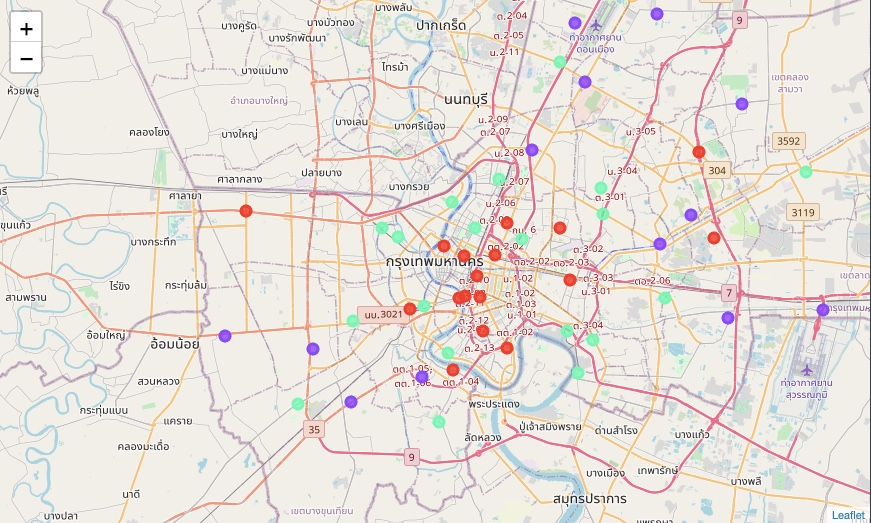

In [37]:
#Display Screenshot of Map Clustering output
Image(filename='Map_Clust.jpg', width='100%')

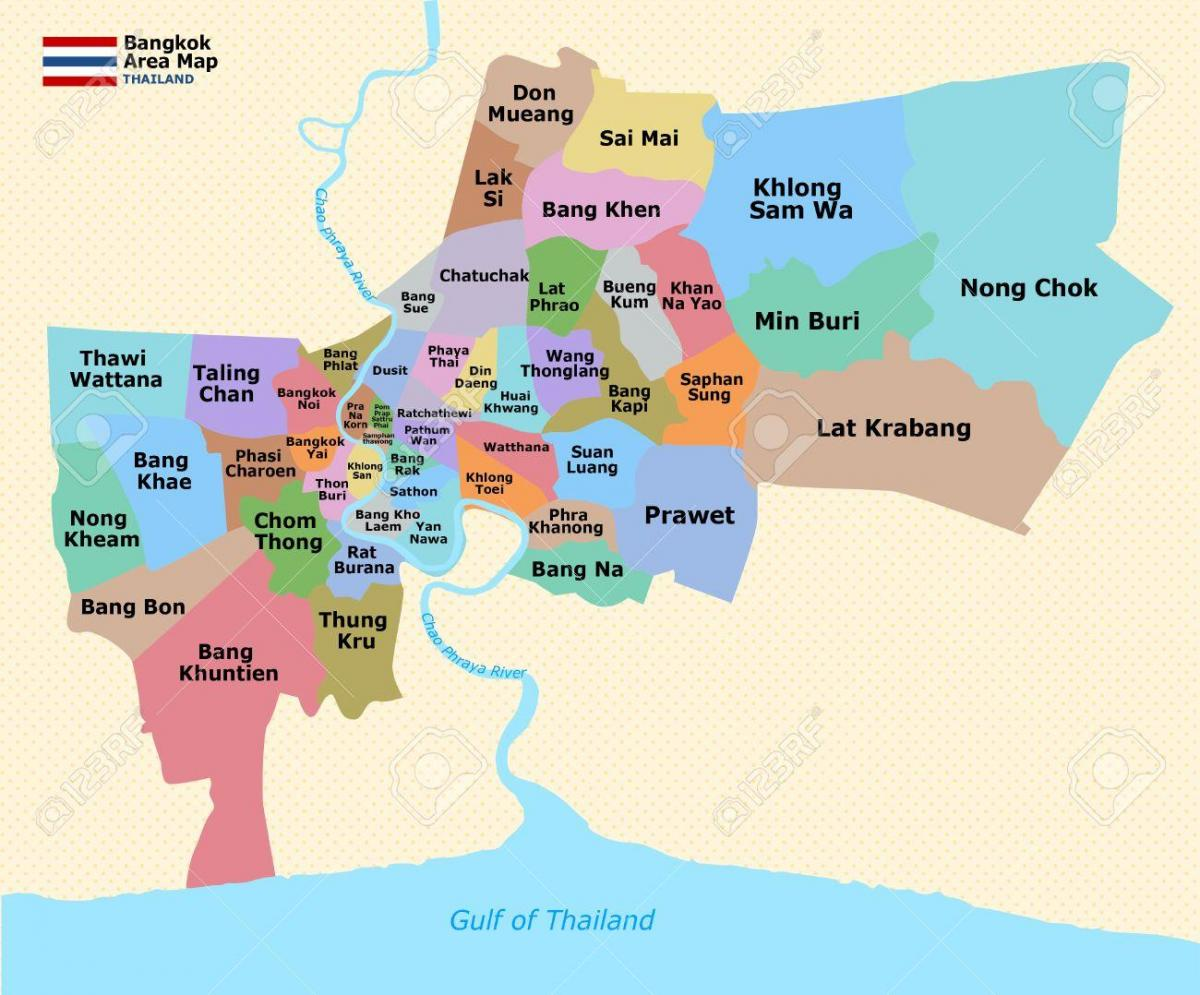

In [38]:
#Display Comparison Map of Districts of Thailand
Image(filename='bkk-districts.jpg', width='100%')

In [39]:
# Save the Map as HTML file
map_clusters.save('map_clusters.html')

In [40]:
# Examine Clusters
df_0 = df_merged.loc[df_merged['Cluster Labels'] == 0]

In [41]:
# Cluster 0
len(df_0)

17

In [42]:
# Cluster 1
df_1 = df_merged.loc[df_merged['Cluster Labels'] == 1]

In [43]:
len(df_1)

14

In [44]:
# Cluster 2
df_2 = df_merged.loc[df_merged['Cluster Labels'] == 2]

In [45]:
len(df_2)

19

## 4. Results <br> 
Results of the Clustering indicate that most of the Muay Thai Gyms are concentrated in the central area of Bangkok within the radius selected; with the highest numbers in Cluster 2(Red) and moderate numbers in Cluster 0(Purple). Comparatively, Cluster 1 is observed to contain a moderately lower number of Muay Thai Gyms in the Neighborhood/Districts. This representation is a viable opportunity, and higher potential areas to open new Muay Thai Gyms, as there is substantially lesser competition from existing Boxing Gyms. <br>
Meanwhile, Boxing Gyms in Cluster 2 are likely being effected from competition due to a higher concentration of Muay Thai Gyms in the area. <br>
From an alternative perspective, this demonstrates that the higher saturation of Muay Thai Gyms primarily occure in the central area of the city, with respect to the specified radius indicated in the map. Therefore, from this analysis, it would be recommended to capitalize on these findings to open new Muay Thai Gyms in the Districts/Neighborhoods as indicated in Cluster 1 with considerably less competition. Developers with unique propositions to stand out from the competition (e.g. Muay Thai with MMA or BJJ Training) can also open new Muay Thai Gyms in Neighborhoods/Districts in Cluster 0 with a moderate level of competition. <br>
Lastly, property developers & potential Muay Thai/MMA Gyms owners may be advised to avoid neighborhoods within Cluster 2, which already have high concentration of Muay Thai Boxing gyms and are effected to a greater degree from increased competition within the region.


## 5. Discussion <br>
Developers & potential Boxing Gym owners also have an opportunity to stand out from the already established competition within the highly saturated districts, by combining aspects of complimentary relevant martial arts combination trends. An example of this would be adding a legitamate Mixed Martial Arts program in addition to the Muay Thai Program, to capitalize on the growing sport of MMA within the region(E.g. One Championship in Singapore, & UFC in the United States). <br>
Another example would be adding a Brazilian Jiu-jitsu program, that does not conflict with the Muay Thai Boxing schedual. This would allow the gym to benefit from the increasing worldwide popularity of Sport Jiu-jitsu as well, while adding the unique factor of grappling/ground fighting to increase the potential marketability, and niche to the gym among the local competition.

## 6. Conclusion <br>
In conclusion, more analytical methods & techniques can be added to the project to increase the specificity of the results we wish to derive. Further analysis can be done to determine additional viable options for which neighborhoods are the best choices for a new Muay Thai gym, as this project was completed during the COVID-19 Pandemic while in Thailand. <br>
This has resulted in a currently unknown number of gyms and businesses shutting down temporarily, or possibly permanently within the regions discussed. This would make the current results from this project in need of reassessment once the pandemic is over, to provide a better understanding of the current number of Muay Thai gyms in the relevant areas/clusters discussed; which of course would directly impact which areas are advisable to open a new Muay Thai Gym in the available Bangkok districts.

ขอบคุณมากครับ(Thank You!)


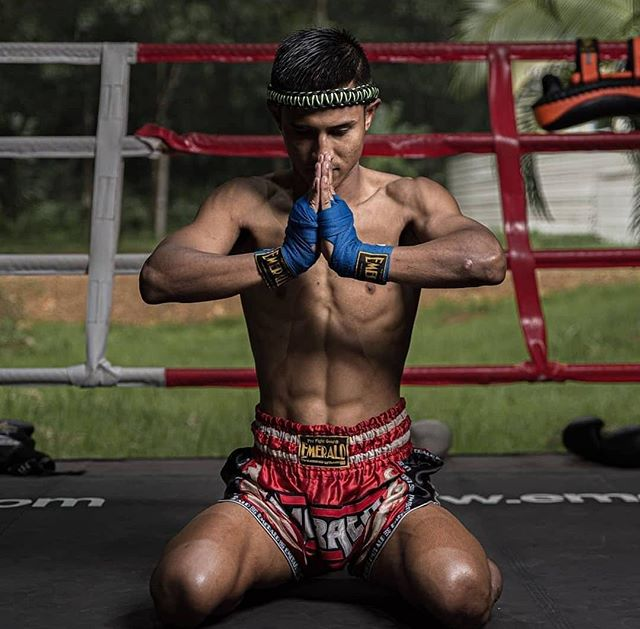

In [46]:
#Photo Courtesy of Emerald Muay Thai Gym (Emerald-Gym.com)

print("ขอบคุณมากครับ(Thank You!)")
Image(filename='end.jpg', width='100%')